In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
import pyvo as vo
from IPython.display import Image as ipImage, display
from astropy.io import fits
import astropy.units as u
from astropy.coordinates import SkyCoord
from matplotlib.colors import LogNorm
import sys
from astropy.visualization import make_lupton_rgb
from astropy.wcs import WCS
from astroquery.vizier import Vizier
from astropy.coordinates import Angle
import importlib
import proj2_runfile
importlib.reload(proj2_runfile)
from proj2_runfile import HUDF_Plotter, HUDF_z_Catalog
from math import ceil

In [3]:
hudfp = HUDF_Plotter()
rgb = hudfp.rgb

In [19]:
hudfp = HUDF_Plotter(debug=True)
hudfp.rgb = rgb

In [20]:
hudfp.add_z_catalog(catalog_id='J/AJ/150/31/table5', zcol='zph1', 
                           mag_constraint=25, catalog_key='photz_raf', color='y')
hudfp.add_z_catalog(catalog_id='J/A+A/608/A2/combined', zcol='zMuse', 
                           mag_constraint=25, catalog_key='specz_muse', color='m')

In [24]:
cat1 = (hudfp.z_catalogs['photz_raf'])
cat2 = (hudfp.z_catalogs['specz_muse'])

 zph1 
------
 0.540
 0.536
 0.118
 0.662
 0.431
 0.829
 1.745
 0.667
 0.647
 0.854
   ...
 0.996
 0.656
 1.258
 1.361
 1.513
 1.005
 0.801
 1.527
 0.229
 1.098
 1.268
Length = 380 rows
  zMuse  
---------
 0.622005
 0.419313
 0.621656
 0.764986
 0.618172
 0.947812
 0.619735
 1.095512
 0.619431
 0.275294
      ...
 1.097916
 0.734374
 1.426596
-0.000110
 0.666584
 1.905858
 1.036736
 1.555038
 1.220563
 1.097093
 1.866085
Length = 302 rows


In [21]:
hudfp.cross_match_catalogs('photz_raf', 'specz_muse', 'cross-match', 'c')

(<proj2_runfile.HUDF_z_Catalog at 0x7f4eb2792080>, 'cross-match')

In [4]:
coords = np.array([[8100, 3500, 4500],[2000, 2100, 4500]])
sizes = np.array([1000, 2000, 1000])
coords, pixels = hudfp.add_inset(coords, sizes)

In [16]:
hudfp.inset_pixels[:,0]
test = np.delete(hudfp.inset_pixels, 3, 1)
test

IndexError: index 3 is out of bounds for axis 1 with size 3

In [79]:
coords = SkyCoord('3h32m36s -27d47m', unit=(u.hourangle, u.deg))
sizes = np.array([1000])
hudfp.add_inset(coords, sizes)

(<SkyCoord (ICRS): (ra, dec) in deg
     [(53.15, -27.78333333)]>,
 array([[6576.20583555],
        [6219.51049589]]))

In [117]:
test = np.array(True)
test

array(True)

In [137]:
coords = [-10,4000]
sizes=[1000]
coords = hudfp.wcs.pixel_to_world(coords[0], coords[1])
contained = np.array(coords.contained_by(hudfp.wcs))
coords = coords[contained]
coords.size

0

In [105]:
hudfp.add_inset([10, 1000], [1000])

IndexError: list index out of range

3499.999999999889,2099.9999999998463;2000.0
4499.999999999512,4499.999999999286;1000.0
6576.205835551513,6219.51049589047;1000.0
99.99999999979264,1000.0000000001437;1000.0


ValueError: zero-size array to reduction operation minimum which has no identity

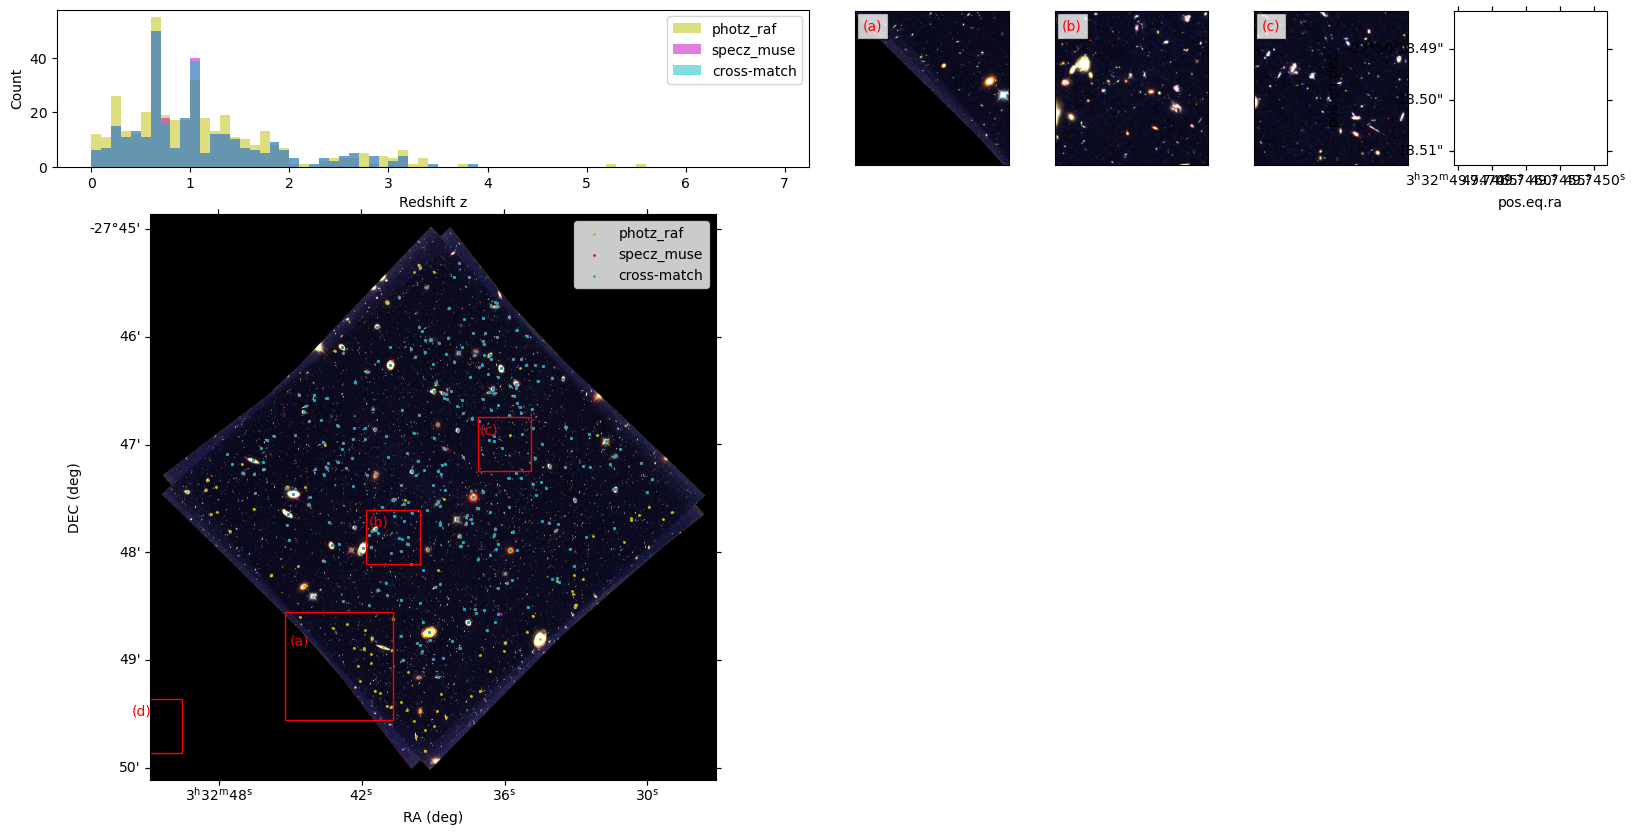

In [154]:
hudfp.plot_multipanel()

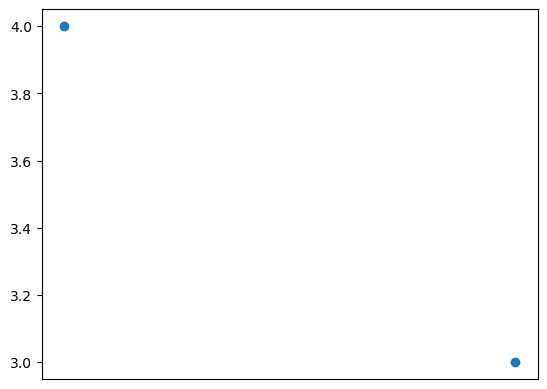

In [65]:
fig, ax = plt.subplots()
ax.scatter([3,4],[4,3])
ax.tick_params(
    axis='x',
    labelbottom=False,
    bottom=False,
    left=False,
    labelleft=False
)

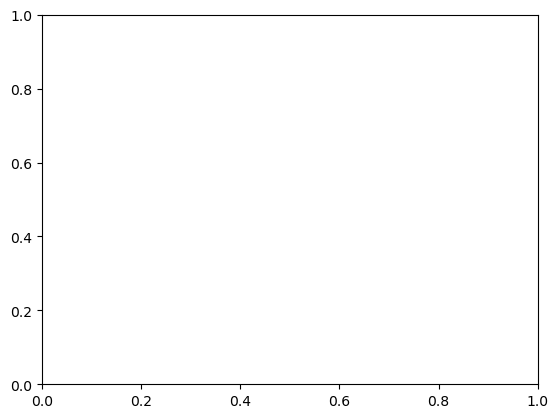

In [30]:
fig, ax = plt.subplots()
ax.transAxes.

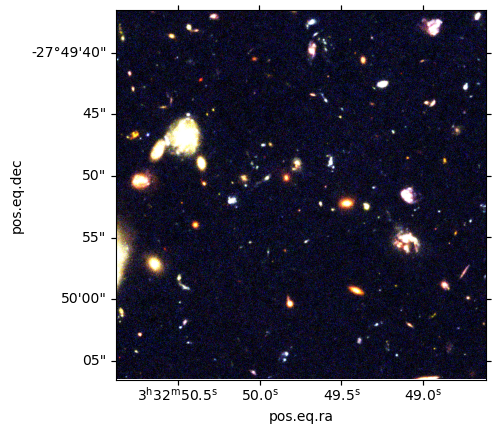

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=hudfp.wcs)
ax.imshow(hudfp.rgb[4000:5000,4000:5000], origin='lower')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

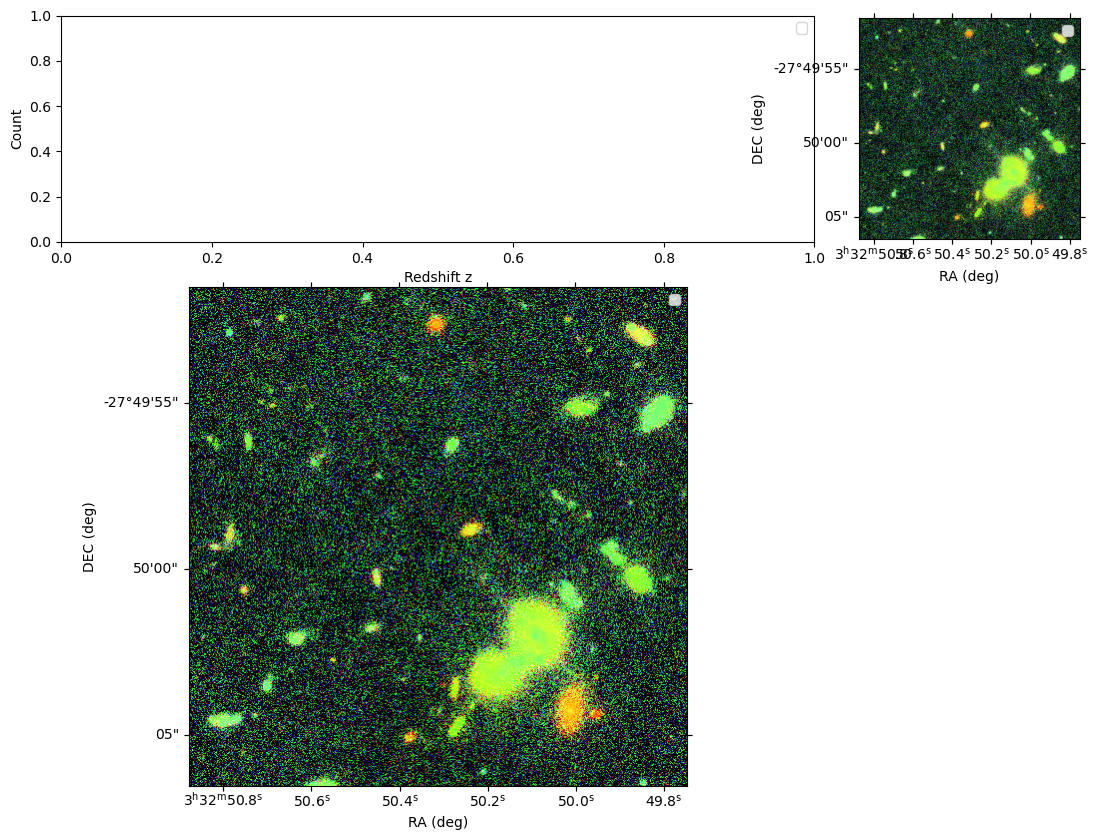

In [80]:
coords = np.array([[-100, 500],[2000, 2100]])
sizes = np.array([1000, 2000])
hudfp.add_inset(coords, sizes)
hudfp.plot_multipanel()

In [45]:
coords = np.array([[-100, 500, 600],[2000, 2100, 2200]])
np.append(np.array([[],[]]), coords, axis=1)

array([[-100.,  500.,  600.],
       [2000., 2100., 2200.]])

In [9]:
pixels.size

AttributeError: 'list' object has no attribute 'size'

In [14]:
n = 5
n = ceil(np.sqrt(n))
n

3

In [36]:
new_coords = [1000, 2000]
new_coords = hudfp.wcs.pixel_to_world(new_coords[0], new_coords[1])
contained = new_coords.contained_by(hudfp.wcs)
new_coords = new_coords[contained]
new_pixels = new_coords.to_pixel(hudfp.wcs)
new_pixels = list(new_pixels)
print(np.append(pixels[0], new_pixels[0]))

[ 500.  600. 1000.]


In [2]:
test = {3:4}
len(test) == 0

False

In [21]:
test[[False, False, False, False, False]]

0

In [ ]:
size = [1000, 2000, 1000, 1000]

In [52]:
sizes = [2, 4, 3, 1] * u.arcsec
test = [3, 4] * u.arcsec
sizes = sizes.insert(0, test)
sizes

<Quantity [3., 4., 2., 4., 3., 1.] arcsec>

In [102]:
np.unravel_index(4,(3,3))

(1, 1)

In [12]:
hudf_plotter.inset_coords = test
hudf_plotter.inset_sizes = [1000, 1000, 1000, 1000, 1000]

TypeError: can only concatenate tuple (not "int") to tuple

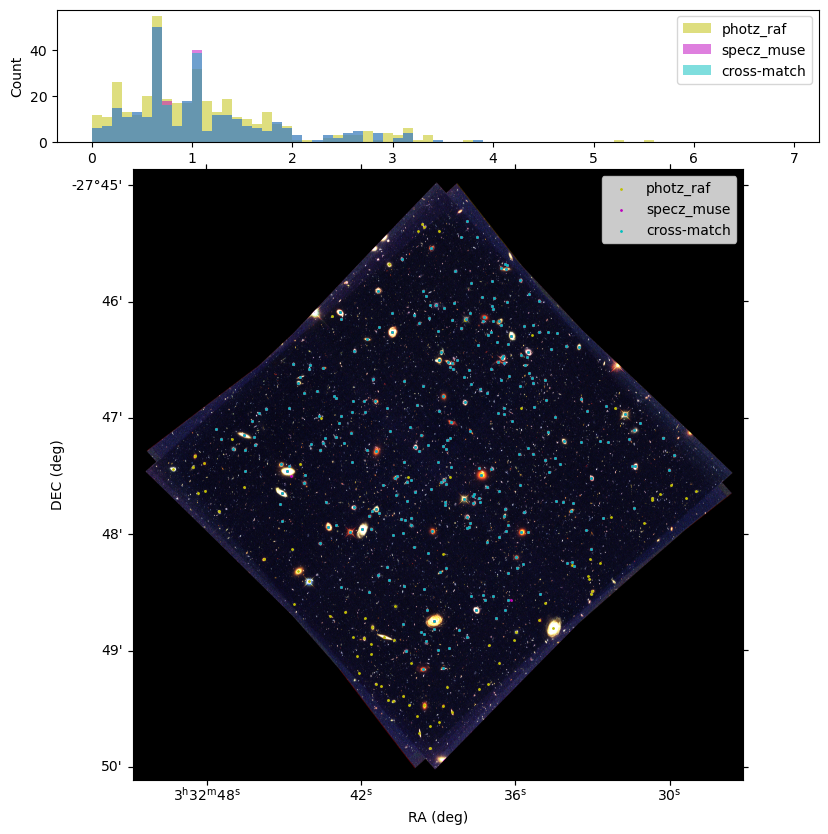

In [14]:
### Get catalogs to plot
plot_dict = hudf_plotter.get_plot_catalogs(True)
n = len(hudf_plotter.inset_coords) # Number of insets

### Plot 
fig = plt.figure(figsize=(20,10))
gs = fig.add_gridspec(n, 2*n)
# HUDF image on left half of figure
imax = fig.add_subplot(gs[1:n,0:n], projection=hudf_plotter.wcs)
imax, _ = hudf_plotter.plot(plot_catalogs=True, ax=imax)
# Redshift distribution above HUDF image on left side
histax = fig.add_subplot(gs[0,0:n])
hudf_plotter.plot_z_dist(plot_catalogs=True, ax=histax)

# Plot insets
insetax = np.zeros((n,n))
for i, (coord, size) in enumerate(zip(hudf_plotter.inset_coords, hudf_plotter.inset_sizes)):
    # Plot inset square on main image
    plot_ind = np.unravel_index(i, (n,n))
    ax = fig.add_subplot(gs[plot_ind,plot_ind+n], projection=hudf_plotter.wcs)
    _, ax = hudf_plotter.plot(plot_catalogs=False, ax=ax)
    
    insetax[plot_ind] = ax


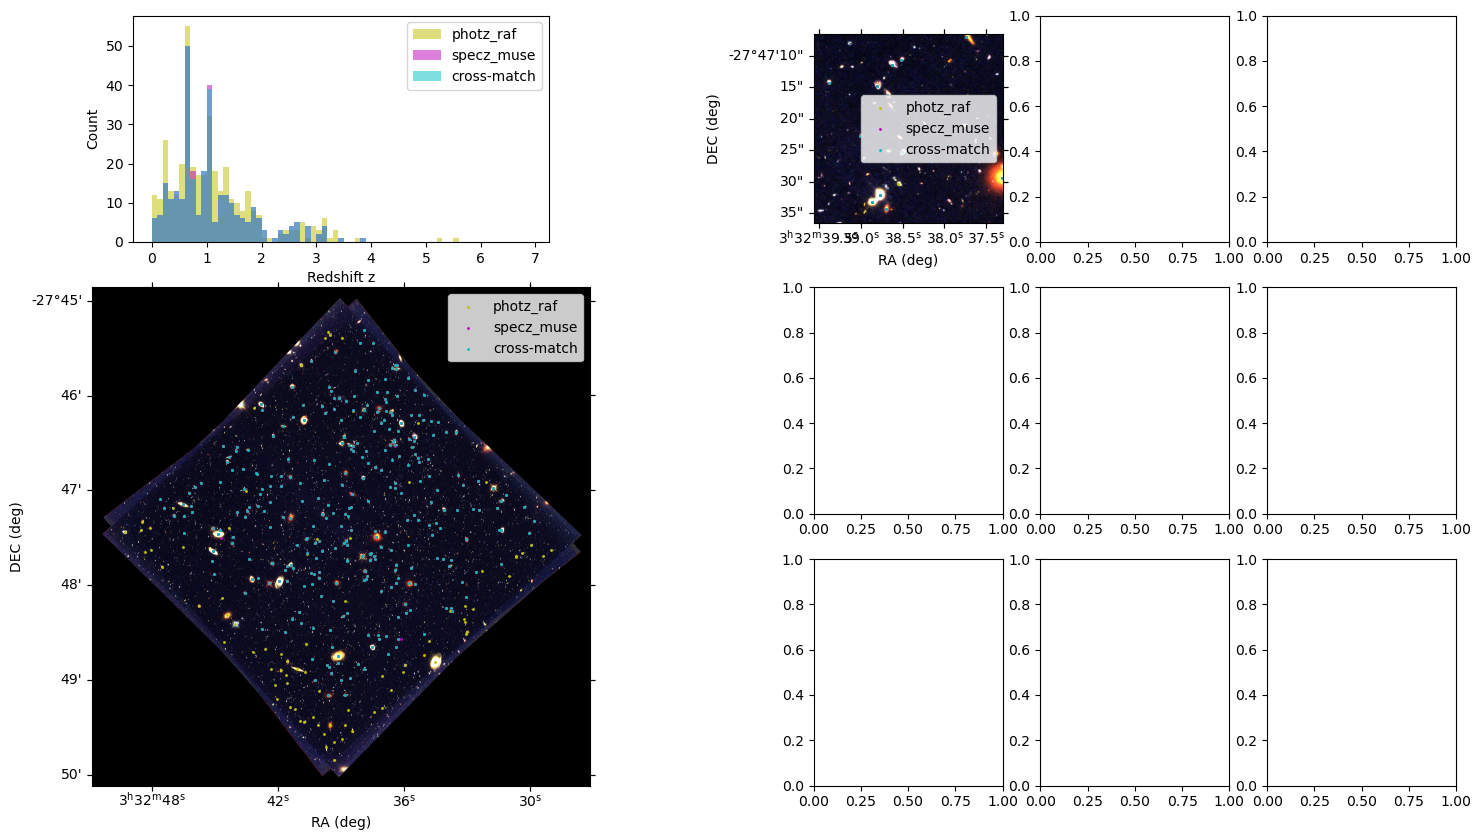

In [72]:
fig = plt.figure(figsize=(20,10))
gs = fig.add_gridspec(3,6)
ax1 = fig.add_subplot(gs[1:3,0:4], projection=hudf_plotter.wcs)
ax1 = hudf_plotter.plot(ax=ax1)
ax2 = fig.add_subplot(gs[0,1:3])
ax2 = hudf_plotter.plot_z_dist(ax=ax2)
ax3 = fig.add_subplot(gs[0,4], projection=hudf_plotter.wcs)
_, ax3 = hudf_plotter.plot(ax=ax3)
ax3.set_xlim(5000,6000)
ax3.set_ylim(5000,6000)
ax3 = fig.add_subplot(gs[0,5])
ax3 = fig.add_subplot(gs[0,6])
ax3 = fig.add_subplot(gs[1,4])
ax3 = fig.add_subplot(gs[1,5])
ax3 = fig.add_subplot(gs[1,6])
ax3 = fig.add_subplot(gs[2,4])
ax3 = fig.add_subplot(gs[2,5])
ax3 = fig.add_subplot(gs[2,6])

In [93]:
coord = SkyCoord('03h32m36s -27d47m00s', unit=(u.hourangle, u.deg))
size = 40 * u.arcsec
box_pixels = hudf_plotter.wcs.world_to_pixel(coord)
dra = coord.ra + size
ddec = coord.dec + size
dpixel = hudf_plotter.wcs.world_to_pixel(SkyCoord(dra, ddec))
dpixel = (np.abs(dpixel[0] - box_pixels[0]), np.abs(dpixel[1] - box_pixels[1]))
print(dpixel)
box_pixels = (box_pixels[0] - dpixel[0]/2, box_pixels[1] - dpixel[1]/2)
print(box_pixels)
dpixel = np.mean(dpixel)
print(dpixel)
# ras = [coord.ra - size/2, coord.ra - size/2, coord.ra + size/2]
# decs = [coord.dec - size/2, coord.dec + size/2, coord.dec - size/2]
# box_coord = SkyCoord(ras, decs)
# box_pixels = wcs.world_to_pixel(box_coord)
# print(box_pixels)
# test1 = (box_pixels[0][0] - box_pixels[0][2])
# test2 = (box_pixels[1][0] - box_pixels[1][1])

(1180.0390704222991, 1333.0188319416357)
(5986.186300340363, 5553.0010799196525)
1256.5289511819674


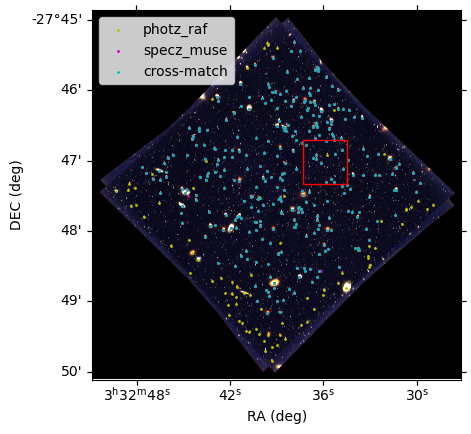

In [94]:
fig, ax = hudf_plotter.plot()
rect = plt.Rectangle(box_pixels, dpixel, dpixel, fill=False, color='r')

ax.add_patch(rect)

In [33]:
hudf_plotter.wcs.pixel_to_world([30, 40], [40, 50])

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    [(53.21170573, -27.83480632), (53.21161143, -27.83472305)]>

(<Figure size 640x480 with 1 Axes>,
 <WCSAxesSubplot:xlabel='RA (deg)', ylabel='DEC (deg)'>)

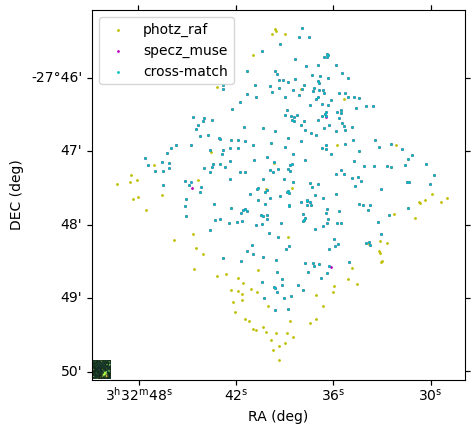

In [72]:
hudf_plotter.plot()

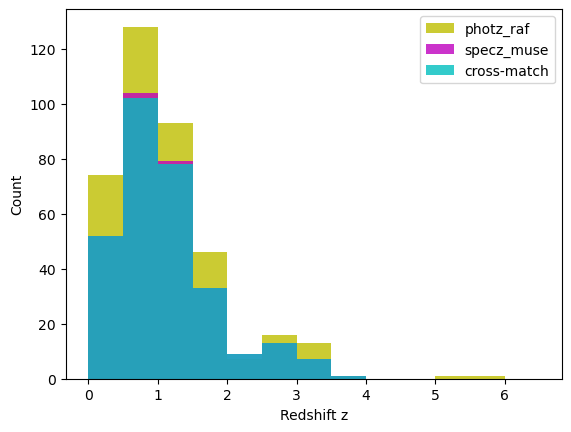

In [73]:
hudf_plotter.plot_z_dist()

In [47]:
print(hudf_plotter.z_catalogs['photz_raf'].coords.size)
print(hudf_plotter.z_catalogs['specz_muse'].coords.size)
print(hudf_plotter.z_catalogs['test'].coords.size)

380
302
299


In [54]:
test = HUDF_z_Catalog('J/AJ/150/31/table5', zcol='zph1', mag_constraint=25)
type(test.coords)

astropy.coordinates.sky_coordinate.SkyCoord

In [2]:
hudf = []
hudf_header = []
xmin = 4000
xmax = 6500
ymin = 4000
ymax = 6500
rgb_scale = (0.6, 0.3, 0.9)
rgb_max = 0.001
print('Loading Hubble UDF fits files...')
for i, c in enumerate(['i', 'v', 'b']):
    txt = f'\r    Loading {c} image'
    sys.stdout.write(txt)
    sys.stdout.flush()
    with fits.open(f'data/h_udf_wfc_{c}_drz_img.fits') as hdul:
        #hudf.append(hdul[0].data[xmin:xmax,ymin:ymax])
        #hudf.append(hdul[0].data * rgb_scale[i])
        #hudf[i][hudf[i] > rgb_max] = rgb_max
        hudf_header.append(hdul[0].header)
print('')
print('Finished Loading')

Loading Hubble UDF fits files...
    Loading b image
Finished Loading


In [12]:
r = hudf[0]
g = hudf[1]
b = hudf[2]

In [40]:
hudf[0].shape

IndexError: list index out of range

In [3]:
wcs = WCS(hudf_header[0])
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 53.122751  -27.805089  
CRPIX : 9470.5  3610.5  
CD1_1 CD1_2  : -8.3333333333333e-06  0.0  
CD2_1 CD2_2  : 0.0  8.33333333333334e-06  
NAXIS : 10500  10500

In [11]:
type(wcs)

astropy.wcs.wcs.WCS

In [9]:
r = hudf[0] * 0.6
g = hudf[1] * 0.3
b = hudf[2] * 0.9
t =  0.001
r[r > t] = t
g[g > t] = t
b[b > t] = t

# hudf_rgb = make_lupton_rgb(r, g, b, Q=0.00001, stretch=0.0012, filename='hudf.jpeg')

# fig = plt.figure(figsize=(12,12))
# axes = fig.add_subplot(111, projection=wcs)
# axes.imshow(hudf_rgb, origin='lower')
#axes.scatter(pixel_coords[0], pixel_coords[1], s=1)

In [7]:
hudf_rgb = make_lupton_rgb(r, g, b, Q=0.0001, stretch=0.001, filename='hudf.jpeg')

In [4]:
from proj2_runfile import load_hudf_z_vizier
### Load redshifts from catalogs
catalog_ids = {
    'photz_raf':'J/AJ/150/31/table5', 
    'specz_muse':'J/A+A/608/A2/combined'
}
photz_raf = load_hudf_z_vizier(catalog_ids['photz_raf'], zcol='zph1', mag_limit=25)
specz_muse = load_hudf_z_vizier(catalog_ids['specz_muse'], zcol='zMuse', mag_limit=25)

### Crossmatch catalogs
idx, sep2d, dist3d = specz_muse['sky'].match_to_catalog_sky(photz_raf['sky'])
crossmatchz = {}
for key, vals in photz_raf.items():
    crossmatchz[key] = vals[idx]
print(photz_raf['sky'].size)
print(specz_muse['sky'].size)
print(crossmatchz['sky'].size)

pixels_photz = wcs.world_to_pixel(photz_raf['sky'])
pixels_specz = wcs.world_to_pixel(specz_muse['sky'])
pixels_bothz = wcs.world_to_pixel(crossmatchz['sky'])

380
302
302


In [61]:
coord = SkyCoord('03h32m42s -27d47m00s', unit=(u.hourangle, u.deg))
size = 20 * u.arcsec
box_pixels = wcs.world_to_pixel(coord)
dra = coord.ra + size
ddec = coord.dec + size
dpixel = wcs.world_to_pixel(SkyCoord(dra, ddec))
dpixel = (np.abs(dpixel[0] - box_pixels[0]), np.abs(dpixel[1] - box_pixels[1]))
print(dpixel)
box_pixels = (box_pixels[0] - dpixel[0]/2, box_pixels[1] - dpixel[1]/2)
print(box_pixels)
dpixel = np.mean(dpixel)
print(dpixel)
# ras = [coord.ra - size/2, coord.ra - size/2, coord.ra + size/2]
# decs = [coord.dec - size/2, coord.dec + size/2, coord.dec - size/2]
# box_coord = SkyCoord(ras, decs)
# box_pixels = wcs.world_to_pixel(box_coord)
# print(box_pixels)
# test1 = (box_pixels[0][0] - box_pixels[0][2])
# test2 = (box_pixels[1][0] - box_pixels[1][1])

(590.1253067926527, 666.4028611552549)
(3626.99228915719, 5885.450416038458)
628.2640839739538


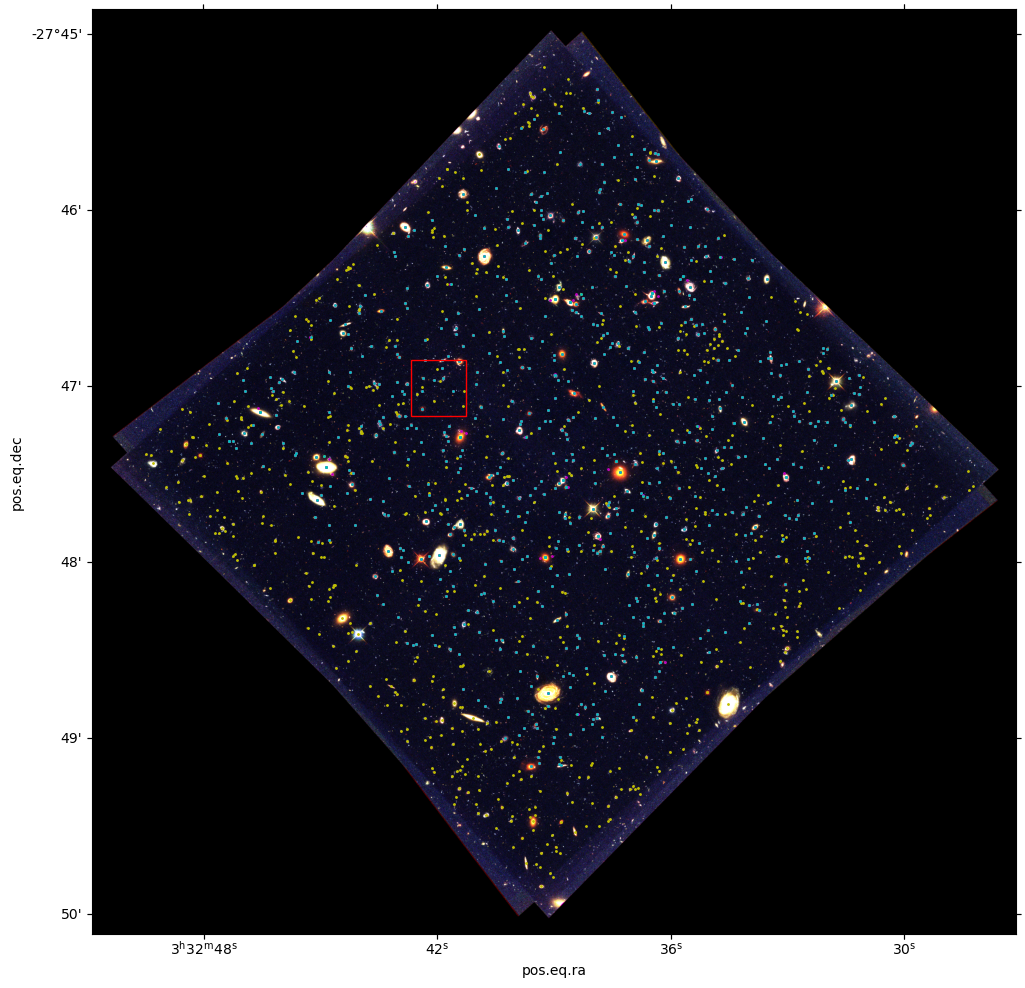

: 

In [62]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(hudf_rgb, origin='lower')
ax.scatter(pixels_photz[0], pixels_photz[1], s=1, c='y', label='Photo-')
ax.scatter(pixels_specz[0], pixels_specz[1], s=1, c='m')
ax.scatter(pixels_bothz[0], pixels_bothz[1], s=1, c='c')

coord = SkyCoord('03h32m42s -27d47m00s', unit=(u.hourangle, u.deg))
size = 20 * u.arcsec

rect = plt.Rectangle(box_pixels, dpixel, dpixel, fill=False, color='r')

ax.add_patch(rect)

In [8]:
services = vo.regsearch(keywords='hubble udf')
services.to_table()['ivoid','short_name','res_title']

<Table length=10>
            ivoid              ...
            object             ...
------------------------------ ...
       ivo://cds.vizier/ii/258 ...
 ivo://cds.vizier/j/aj/132/926 ...
  ivo://cds.vizier/j/aj/150/31 ...
ivo://cds.vizier/j/apj/612/l93 ...
 ivo://cds.vizier/j/apj/624/l5 ...
 ivo://cds.vizier/j/apj/631/85 ...
ivo://cds.vizier/j/apj/639/724 ...
 ivo://mast.stsci/siap/hst.udf ...
   ivo://mast.stsci/siap/udfuv ...
  ivo://nasa.heasarc/hubbleudf ...

In [9]:
coord = SkyCoord('3 32 38.92 -27 47 29.37', unit=(u.hourangle, u.degree))
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (53.16216667, -27.79149167)>

In [12]:
im_table = services[2].search(pos=coord)
im_table.to_table()

<Table length=169>
   _r    recno  UDF    RAJ2000    ...  E_zph2  chi2r   Pzph2     SimbadName  
                         deg      ...                                        
float64  int32  str5   float64    ... float32 float32 float32      str15     
-------- ----- ----- ------------ ... ------- ------- ------- ---------------
0.030771     1   373  53.15437485 ...    0.12    1.22    1.00 [CBS2006]   224
0.027765     2   534  53.16170093 ...    0.09    0.56    1.00 [CBS2006]   355
0.025879     3   865  53.17450843 ...    0.09    0.84    1.00 [CBS2006]   662
0.024990     4   983  53.14989262 ...    0.11    1.44    1.00 [CBS2006]   797
0.026427     5  1035  53.17634676 ...    0.13    7.85    0.93 [CBS2006]   830
0.022407     6  1060  53.15915906 ...    0.08    2.45    1.00 [CBS2006]   853
0.022732     7  1077  53.16529350 ...    0.29    1.03    1.00 [CBS2006]   865
0.022088     8  1134  53.16817307 ...    0.09    1.48    1.00 [CBS2006]   901
0.025937     9  1220  53.17932560 ...    0.06   11.48    1.00 [CBS2006]  1025
     ...   ...   ...          ... ...     ...     ...     ...             ...
0.023572   160 50453  53.15783950 ...    0.07    2.23    1.00 [CBS2006]   769
0.020486   161 50714  53.15110943 ...    0.04    2.93    1.00 [CBS2006]  1347
0.013237   162 51690  53.17618009 ...    0.06    6.54    1.00 [CBS2006]  3372
0.022846   163 51705  53.18782913 ...    0.06    0.93    1.00 [CBS2006]  3492
0.016862   164 51802  53.18070762 ...    0.09    2.69    1.00 [CBS2006]  3752
0.021669   165 52744  53.13767788 ...    0.09    2.29    1.00 [CBS2006]  4438
0.009185   166 53465  53.16236730 ...    0.07    1.84    1.00 [CBS2006]  7081
0.022384   167 54337  53.15059559 ...    0.06    0.69    1.00 [CBS2006]  7688
0.020724   168 54427  53.14905599 ...    0.08    5.16    1.00 [CBS2006]  8261
0.021607   169 54454  53.14794797 ...    0.07    4.54    1.00 [CBS2006]  8585

In [17]:
coord = SkyCoord('3h32m38.92s -27d47m29.37s', unit=(u.hourangle, u.degree))
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (53.16216667, -27.79149167)>

In [ ]:
J/A+A/608/A2 MUSE
J/AJ/150/31 Rafelski 2015

In [16]:
catalog_list = Vizier.find_catalogs('Photometry and redshifts of galaxies in the UDF')
print({k:v.description for k,v in catalog_list.items()})

{'J/AJ/150/31': 'Photometry and redshifts of galaxies in the UDF (Rafelski+, 2015)'}


In [17]:
catalog = Vizier.get_catalogs(list(catalog_list.keys())[0])
catalog

TableList with 2 tables:
	'0:J/AJ/150/31/table5' with 20 column(s) and 50 row(s) 
	'1:J/AJ/150/31/table4' with 9 column(s) and 50 row(s) 

In [41]:
result = Vizier.query_region(coord, radius=Angle(4.0, 'arcmin'), catalog=catalog_name)
result

Empty TableList

In [9]:
from astroquery.sdss import SDSS

In [24]:
result = SDSS.query_region(coord, radius='2 arcsec')

In [25]:
print(result)

None
